<a href="https://colab.research.google.com/github/danendrafau/customer-segmentation/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Danendra_Fahar_Utama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**: Kaggle - [Shop Customer Data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset/) (sesuai rekomendasi dicoding)
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#load dataset
data = pd.read_csv("https://raw.githubusercontent.com/danendrafau/customer-segmentation/refs/heads/main/input_data/customers.csv")

#preview data
print(data.head())

   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
#cek baris kolom
data.shape

(2000, 8)

**Note:**

- Kolom "CustomerID", "Age", "Annual Income ($)", "Spending Score (1-100)", "Work Experience", dan "Family Size" bertipe numerikal (6 kolom).
- Kolom "Gender" dan "Profession" bertipe kategorikal (2 kolom).

In [4]:
#cek duplikat
print('Jumlah data duplikat: ', data.duplicated().sum())

#cek missing values
print('Jumlah missing value:')
print(data.isnull().sum())

Jumlah data duplikat:  0
Jumlah missing value:
CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64


count      2000.000000
mean     110731.821500
std       45739.536688
min           0.000000
25%       74572.000000
50%      110045.000000
75%      149092.750000
max      189974.000000
Name: Annual Income ($), dtype: float64


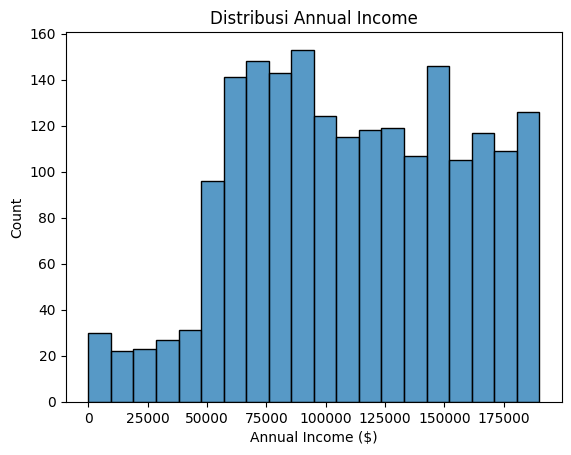

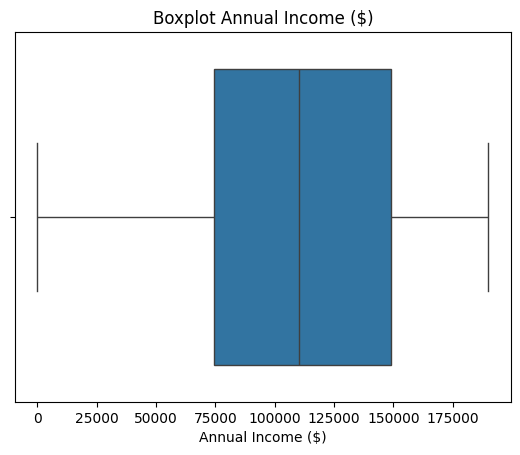

In [5]:
#stat desk
print(data['Annual Income ($)'].describe())

# Histogram
sns.histplot(data['Annual Income ($)'], bins=20)
plt.title('Distribusi Annual Income')
plt.show()

# Boxplot
sns.boxplot(x=data['Annual Income ($)'])
plt.title('Boxplot Annual Income ($)')
plt.show()

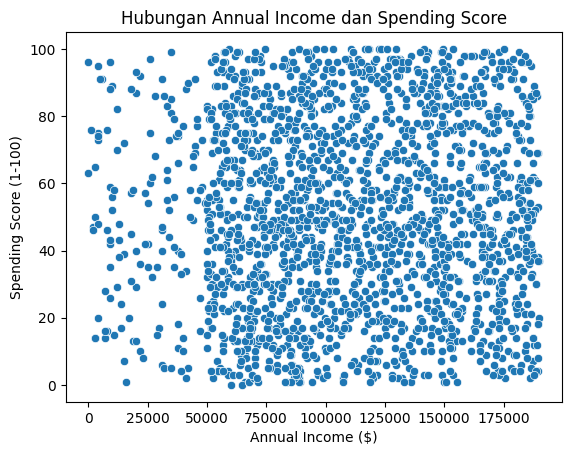

In [6]:
#scatter
sns.scatterplot(x='Annual Income ($)', y='Spending Score (1-100)', data=data)
plt.title('Hubungan Annual Income dan Spending Score')
plt.show()

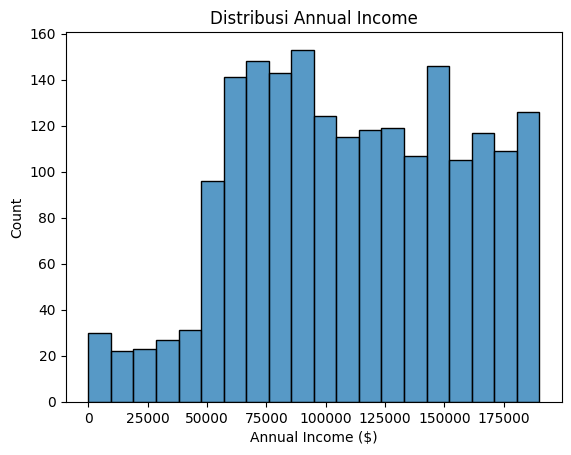

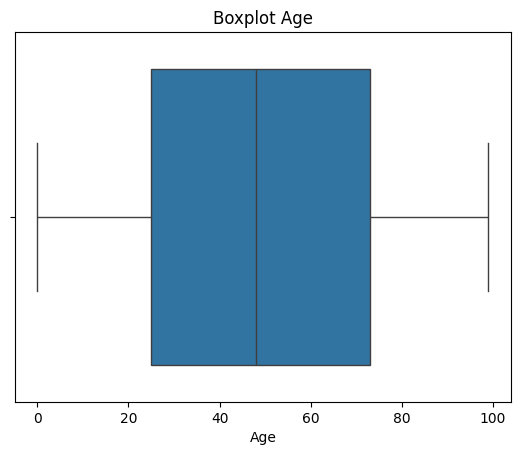

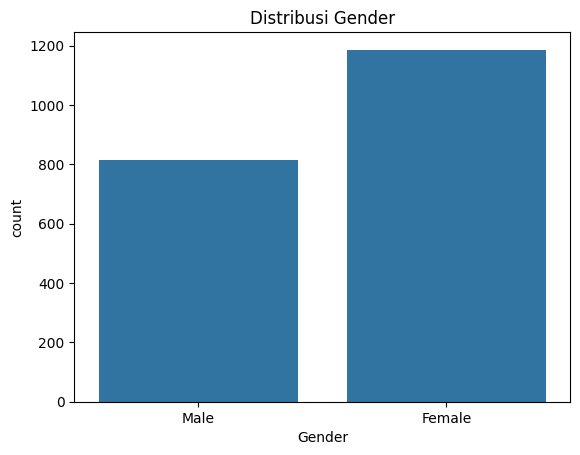

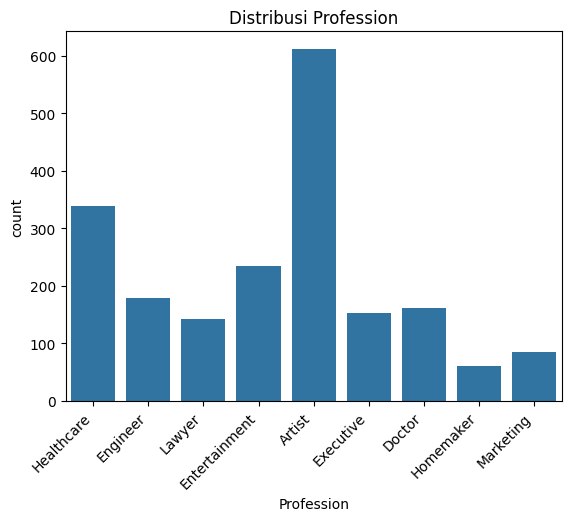

In [7]:
#histogram
sns.histplot(data['Annual Income ($)'], bins=20)
plt.title('Distribusi Annual Income')
plt.show()

#boxplot
sns.boxplot(x=data['Age'])
plt.title('Boxplot Age')
plt.show()

#batang
sns.countplot(x='Gender', data=data)
plt.title('Distribusi Gender')
plt.show()

#batang
sns.countplot(x='Profession', data=data)
plt.title('Distribusi Profession')
plt.xticks(rotation=45, ha='right')
plt.show()

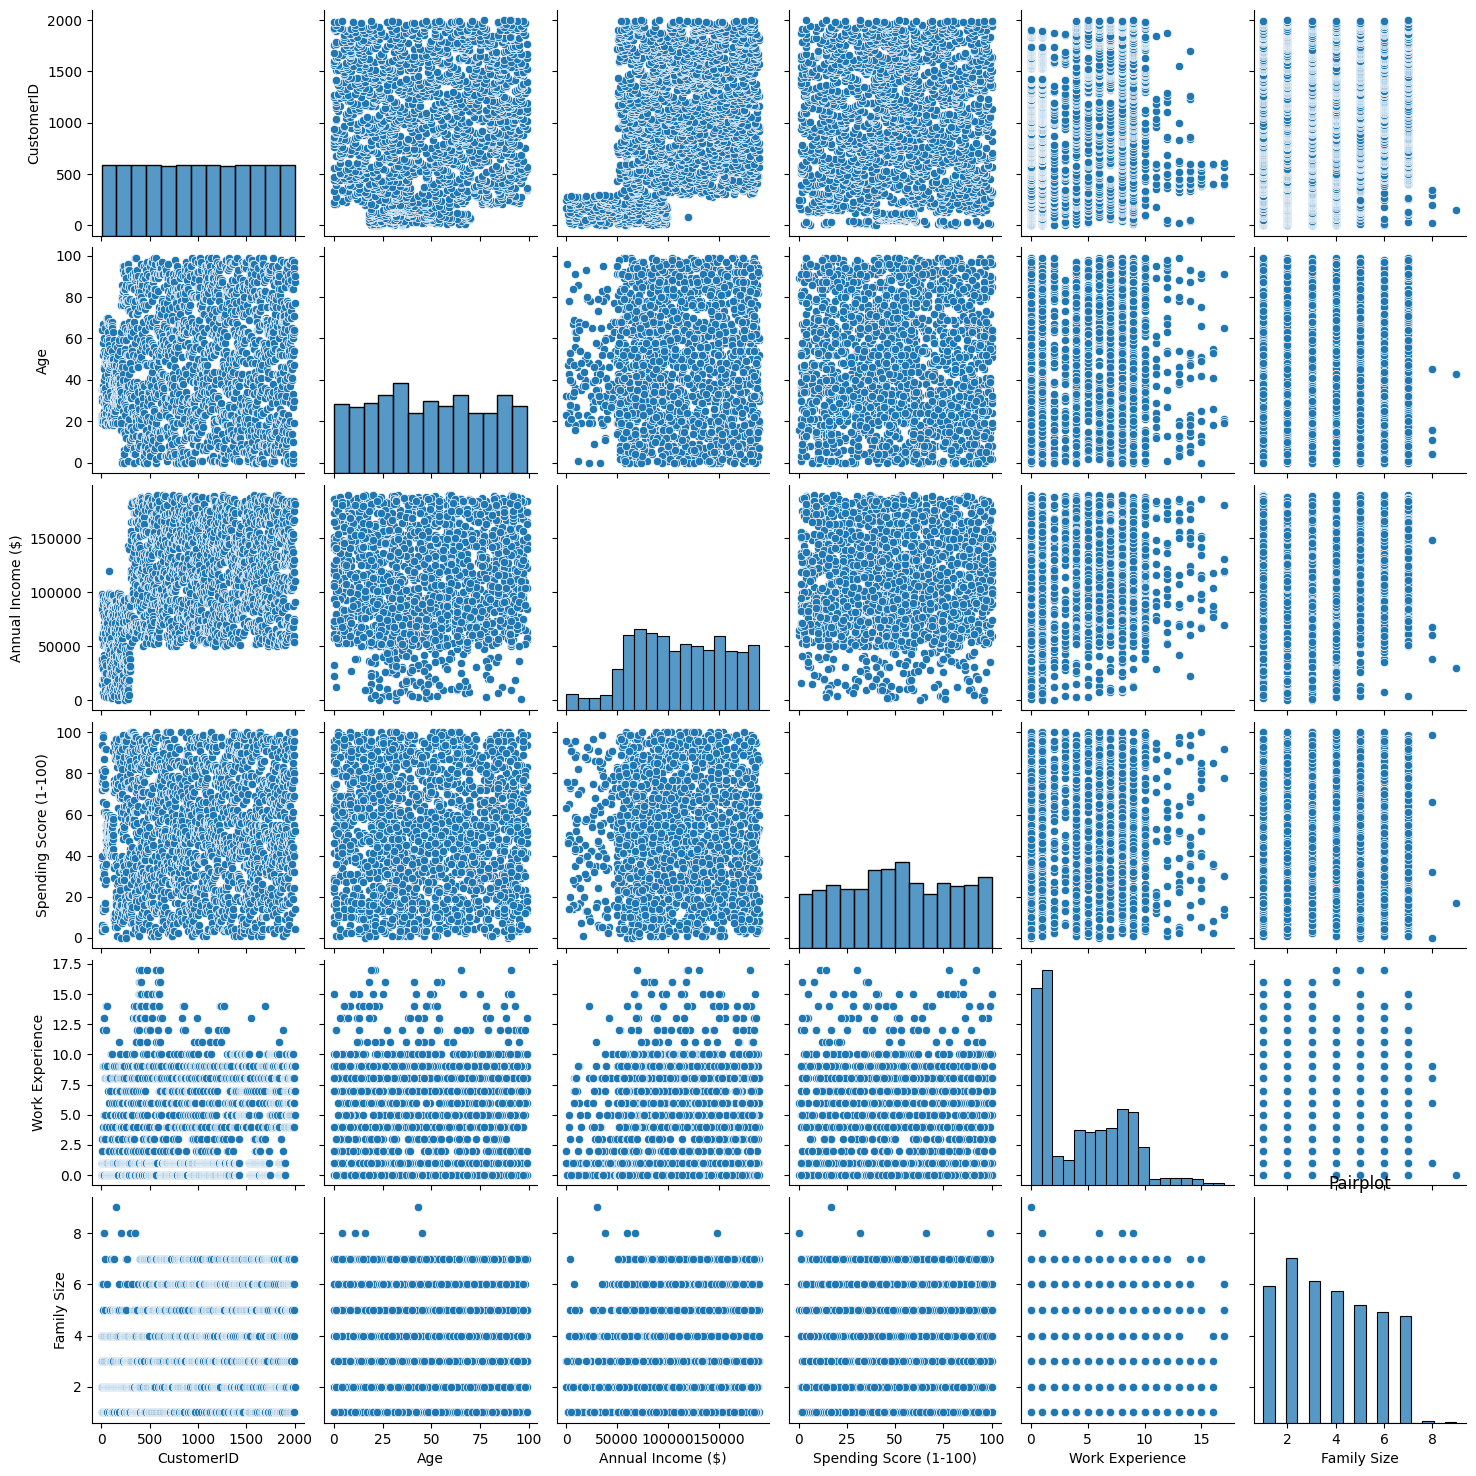

In [8]:
#pairplot
sns.pairplot(data)
plt.title('Pairplot')
plt.show()

In [9]:
# prompt: hitung data pada kolom "Age" yang bernilai <=10 dan =>90

# Hitung data pada kolom "Age" yang bernilai <=10 dan >=90
bocil = data[data['Age'] <= 10].shape[0]
tuwir = data[data['Age'] >= 90].shape[0]

print(f"Jumlah data dengan usia <= 10: {bocil}")
print(f"Jumlah data dengan usia >= 90: {tuwir}")

Jumlah data dengan usia <= 10: 197
Jumlah data dengan usia >= 90: 194


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
#hapus CustomerID
data = data.drop('CustomerID', axis=1)

In [11]:
#rename kolom
data.rename(columns={'Gender': 'gender',
                     'Age': 'age',
                     'Profession': 'profession',
                     'Annual Income ($)': 'annual_income',
                     'Spending Score (1-100)': 'spending_score',
                     'Work Experience': 'work_experience',
                     'Family Size': 'family_size'}, inplace=True)
print(data.head())

   gender  age  annual_income  spending_score     profession  work_experience  \
0    Male   19          15000              39     Healthcare                1   
1    Male   21          35000              81       Engineer                3   
2  Female   20          86000               6       Engineer                1   
3  Female   23          59000              77         Lawyer                0   
4  Female   31          38000              40  Entertainment                2   

   family_size  
0            4  
1            3  
2            1  
3            2  
4            6  


In [12]:
print("Missing values per kolom:\n", data.isnull().sum())
print("\nJumlah NaN values:\n", data.isna().sum())
print("\nTipe data:\n", data.dtypes)
num_rows = data.shape[0]
print(f"\nTotal baris: {num_rows}")

Missing values per kolom:
 gender              0
age                 0
annual_income       0
spending_score      0
profession         35
work_experience     0
family_size         0
dtype: int64

Jumlah NaN values:
 gender              0
age                 0
annual_income       0
spending_score      0
profession         35
work_experience     0
family_size         0
dtype: int64

Tipe data:
 gender             object
age                 int64
annual_income       int64
spending_score      int64
profession         object
work_experience     int64
family_size         int64
dtype: object

Total baris: 2000


In [13]:
#hapus missing values
data.dropna(subset=['profession'], inplace=True)

#cek missing values
print("Missing values per column:\n", data.isnull().sum())

#cek NaN
print("\nNumber of NaN values:\n", data.isna().sum())

Missing values per column:
 gender             0
age                0
annual_income      0
spending_score     0
profession         0
work_experience    0
family_size        0
dtype: int64

Number of NaN values:
 gender             0
age                0
annual_income      0
spending_score     0
profession         0
work_experience    0
family_size        0
dtype: int64


In [14]:
#BAGIAN INI BIKIN MUMET PARAH, KARENA SUDAH WORK SAYA GAMAU OTAK ATIK LAGI
#onehot
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' untuk menghindari dummy trap # Changed 'sparse' to 'sparse_output' to control output format
encoded_columns = encoder.fit_transform(data[['gender', 'profession']])
encoded_col_names = encoder.get_feature_names_out(['gender', 'profession'])
encoded_df = pd.DataFrame(encoded_columns, columns=encoded_col_names, index=data.index)
data = pd.concat([data, encoded_df], axis=1)
data = data.drop(columns=['gender', 'profession'])
print(data)

      age  annual_income  spending_score  work_experience  family_size  \
0      19          15000              39                1            4   
1      21          35000              81                3            3   
2      20          86000               6                1            1   
3      23          59000              77                0            2   
4      31          38000              40                2            6   
...   ...            ...             ...              ...          ...   
1995   71         184387              40                8            7   
1996   91          73158              32                7            7   
1997   87          90961              14                9            2   
1998   77         182109               4                7            2   
1999   90         110610              52                5            2   

      gender_Male  profession_Doctor  profession_Engineer  \
0             1.0                0.0              

In [15]:
#cek ulang missing values
print('Jumlah missing value setelah diisi:')
print(data.isnull().sum())

Jumlah missing value setelah diisi:
age                         0
annual_income               0
spending_score              0
work_experience             0
family_size                 0
gender_Male                 0
profession_Doctor           0
profession_Engineer         0
profession_Entertainment    0
profession_Executive        0
profession_Healthcare       0
profession_Homemaker        0
profession_Lawyer           0
profession_Marketing        0
dtype: int64


**NOTE:**

Data missing sudah hilang.

**NOTE:**

Saya **mencurigai** beberapa data pada kolom "Age" yang bernilai kecil bahkan 0, yang akan saya cek dan analisa terlebih dahulu.

Empty DataFrame
Columns: [age, annual_income, spending_score, work_experience, family_size, gender_Male, profession_Doctor, profession_Engineer, profession_Entertainment, profession_Executive, profession_Healthcare, profession_Homemaker, profession_Lawyer, profession_Marketing]
Index: []


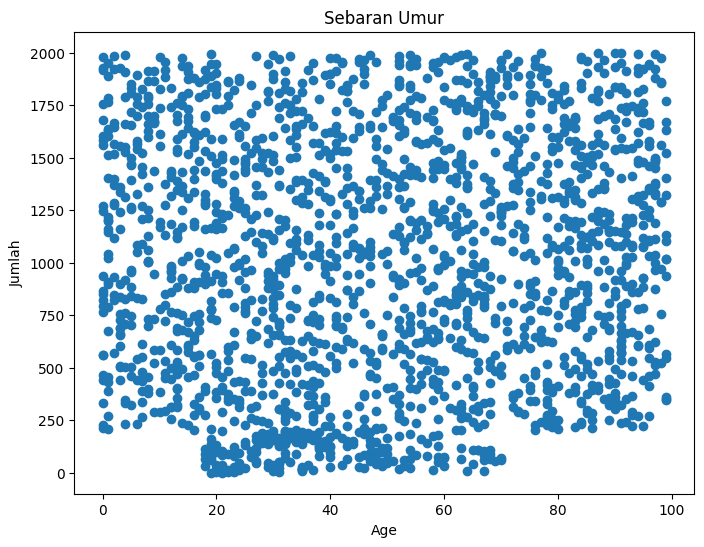

In [16]:
''' cek outlier'''
#IQR
Q1 = np.percentile(data['annual_income'], 25, interpolation='midpoint')
Q3 = np.percentile(data['annual_income'], 75, interpolation='midpoint')
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cek_outliers = data[(data['annual_income'] < lower_bound) | (data['annual_income'] > upper_bound)]

print(cek_outliers)

#scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data['age'], data.index)
plt.xlabel("Age")
plt.ylabel("Jumlah")
plt.title("Sebaran Umur")
plt.show()

**NOTE:**

Terdapat banyak data yang kurang masuk akal seperti usia <=10 tahun dan >=90 tahun. Oleh karena itu saya akan menetapkan beberapa aturan untuk outlier berdasarkan usia ("Age").

- Berdasarkan [Konvensi ILO](https://ilostat.ilo.org/methods/concepts-and-definitions/description-labour-force-statistics/), usia minimum untuk bekerja pada umumnya adalah 15 tahun.
- Menurut data United Nations Population Division yang dirangkum dalam Worldometers ([Goodstats.id](https://goodstats.id/article/angka-harapan-hidup-asean-2024-VNu5v)), angka harapan hidup global di 2024 mencapai 73,3 tahun.

Berdasarkan hasil riset tersebut, maka data pada kolom "Age" dengan nilai <15 dan >73 akan dieliminasi.

In [17]:
# hapus data <15 dan >73 pada "Age"
data = data[(data['age'] >= 15) & (data['age'] <= 73)]

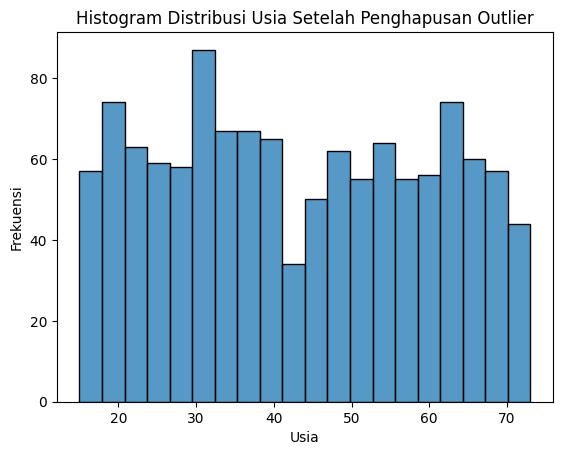

count    1208.000000
mean       43.072848
std        16.844717
min        15.000000
25%        29.000000
50%        42.000000
75%        58.000000
max        73.000000
Name: age, dtype: float64


In [18]:
#histogram
sns.histplot(data['age'], bins=20)
plt.title('Histogram Distribusi Usia Setelah Penghapusan Outlier')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

#statistik
print(data['age'].describe())

In [19]:
#normalisasi
scaler = MinMaxScaler()
features_to_normalize = ['age', 'annual_income', 'spending_score', 'work_experience', 'family_size']
data.loc[:, features_to_normalize] = scaler.fit_transform(data.loc[:, features_to_normalize]).astype('float64')
print(data.head())

        age  annual_income  spending_score  work_experience  family_size  \
0  0.068966       0.078970            0.39         0.058824        0.375   
1  0.103448       0.184264            0.81         0.176471        0.250   
2  0.086207       0.452763            0.06         0.058824        0.000   
3  0.137931       0.310616            0.77         0.000000        0.125   
4  0.275862       0.200058            0.40         0.117647        0.625   

   gender_Male  profession_Doctor  profession_Engineer  \
0          1.0                0.0                  0.0   
1          1.0                0.0                  1.0   
2          0.0                0.0                  1.0   
3          0.0                0.0                  0.0   
4          0.0                0.0                  0.0   

   profession_Entertainment  profession_Executive  profession_Healthcare  \
0                       0.0                   0.0                    1.0   
1                       0.0               

<ipython-input-19-7ecb60642f20>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.06896552 0.10344828 0.0862069  ... 0.84482759 0.06896552 0.96551724]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, features_to_normalize] = scaler.fit_transform(data.loc[:, features_to_normalize]).astype('float64')
<ipython-input-19-7ecb60642f20>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.07897023 0.18426387 0.45276264 ... 0.92265656 0.28492985 0.9707389 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, features_to_normalize] = scaler.fit_transform(data.loc[:, features_to_normalize]).astype('float64')
<ipython-input-19-7ecb60642f20>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. 

In [20]:
print("Missing values per kolom:\n", data.isnull().sum())
print("\nJumlah NaN values:\n", data.isna().sum())
print("\nTipe data:\n", data.dtypes)
num_rows = data.shape[0]
print(f"\nTotal baris: {num_rows}")

Missing values per kolom:
 age                         0
annual_income               0
spending_score              0
work_experience             0
family_size                 0
gender_Male                 0
profession_Doctor           0
profession_Engineer         0
profession_Entertainment    0
profession_Executive        0
profession_Healthcare       0
profession_Homemaker        0
profession_Lawyer           0
profession_Marketing        0
dtype: int64

Jumlah NaN values:
 age                         0
annual_income               0
spending_score              0
work_experience             0
family_size                 0
gender_Male                 0
profession_Doctor           0
profession_Engineer         0
profession_Entertainment    0
profession_Executive        0
profession_Healthcare       0
profession_Homemaker        0
profession_Lawyer           0
profession_Marketing        0
dtype: int64

Tipe data:
 age                         float64
annual_income               float64
s

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [47]:
# Data untuk clustering (fitur numerik dan hasil encoding)
X = data[['age', 'annual_income', 'spending_score', 'work_experience', 'family_size'] + list(data.columns[5:])]

# Menentukan jumlah cluster (misalnya, 5)
n_clusters = 5  # Ganti dengan jumlah cluster optimal yang Anda temukan pada tahap evaluasi

# Inisialisasi model K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melatih model dengan data
kmeans.fit(X)

# Mendapatkan label cluster untuk setiap data point
cluster_labels_kmeans = kmeans.labels_

# Menambahkan label cluster ke dataframe
data['cluster_kmeans'] = cluster_labels_kmeans  # Menggunakan nama kolom yang berbeda untuk setiap algoritma

# Menampilkan hasil clustering
print(data[['age', 'annual_income', 'spending_score', 'cluster_kmeans']].head())

        age  annual_income  spending_score  cluster_kmeans
0  0.068966       0.078970            0.39               1
1  0.103448       0.184264            0.81               4
2  0.086207       0.452763            0.06               4
3  0.137931       0.310616            0.77               3
4  0.275862       0.200058            0.40               1


In [36]:
from sklearn.cluster import AgglomerativeClustering

# Data untuk clustering (fitur numerik dan hasil encoding)
X = data[['age', 'annual_income', 'spending_score', 'work_experience', 'family_size'] + list(data.columns[5:])]

# Menentukan jumlah cluster (misalnya, 5)
n_clusters = 5  # Ganti dengan jumlah cluster optimal yang Anda temukan pada tahap evaluasi

# Inisialisasi model Hierarchical Clustering
# Use 'metric' instead of 'affinity' and remove 'affinity' argument
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')

# Melatih model dengan data
cluster_labels_hierarchical = hierarchical.fit_predict(X)

# Menambahkan label cluster ke dataframe
data['cluster_hierarchical'] = cluster_labels_hierarchical

# Menampilkan hasil clustering
print(data[['age', 'annual_income', 'spending_score', 'cluster_hierarchical']].head())

        age  annual_income  spending_score  cluster_hierarchical
0  0.068966       0.078970            0.39                     1
1  0.103448       0.184264            0.81                     4
2  0.086207       0.452763            0.06                     4
3  0.137931       0.310616            0.77                     2
4  0.275862       0.200058            0.40                     0


In [37]:
from sklearn.cluster import DBSCAN

# Data untuk clustering (fitur numerik dan hasil encoding)
X = data[['age', 'annual_income', 'spending_score', 'work_experience', 'family_size'] + list(data.columns[5:])]

# Menentukan parameter DBSCAN
eps = 0.5  # Ganti dengan nilai epsilon yang sesuai
min_samples = 5  # Ganti dengan nilai minimum samples yang sesuai

# Inisialisasi model DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Melatih model dengan data
cluster_labels_dbscan = dbscan.fit_predict(X)

# Menambahkan label cluster ke dataframe
data['cluster_dbscan'] = cluster_labels_dbscan

# Menampilkan hasil clustering
print(data[['age', 'annual_income', 'spending_score', 'cluster_dbscan']].head())

        age  annual_income  spending_score  cluster_dbscan
0  0.068966       0.078970            0.39               6
1  0.103448       0.184264            0.81              13
2  0.086207       0.452763            0.06              10
3  0.137931       0.310616            0.77               0
4  0.275862       0.200058            0.40               1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data untuk clustering
X = data[['age', 'annual_income', 'spending_score', 'work_experience', 'family_size'] + list(data.columns[5:])]

# Rentang jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)  # Mencoba jumlah cluster dari 2 hingga 10

best_n_clusters = 0
best_silhouette_score = -1

for n_clusters in range_n_clusters:
    # Inisialisasi dan latih model K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(X, cluster_labels)

    print(f"Jumlah cluster: {n_clusters}, Silhouette Score: {silhouette_avg}")

    # Update jumlah cluster optimal jika Silhouette Score lebih tinggi
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = n_clusters

print(f"\nJumlah cluster optimal untuk K-Means: {best_n_clusters} (Silhouette Score: {best_silhouette_score})")

Jumlah cluster: 2, Silhouette Score: 0.5839870166703092
Jumlah cluster: 3, Silhouette Score: 0.5378181018558049
Jumlah cluster: 4, Silhouette Score: 0.5289854838385232
Jumlah cluster: 5, Silhouette Score: 0.45967479180793114
Jumlah cluster: 6, Silhouette Score: 0.41922141680367786
Jumlah cluster: 7, Silhouette Score: 0.4526091718315034
Jumlah cluster: 8, Silhouette Score: 0.5364123230487956
Jumlah cluster: 9, Silhouette Score: 0.46579211123101466
Jumlah cluster: 10, Silhouette Score: 0.49341100098133717

Jumlah cluster optimal untuk K-Means: 2 (Silhouette Score: 0.5839870166703092)


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [23]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [24]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [25]:
#Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.